# Problem 8: Bank Marketing Classification with ANN

This notebook solves Problem 8 of the assignment. The objective is to build, train, and evaluate a multilayer Artificial Neural Network (ANN) to predict whether a client will subscribe to a term deposit.

The steps are as follows:
1.  **Load and Preprocess the Data**: Load `ANN_Bank_Marketing.csv`, handle missing values, and encode categorical features.
2.  **Build the ANN Model**: Create a neural network with two hidden layers (ReLU activation) and a sigmoid output layer.
3.  **Compile and Train**: Compile the model with an appropriate optimizer and loss function, then train it on the dataset.
4.  **Evaluate Performance**: Test the model's accuracy with different epochs and batch sizes.
5.  **Experiment with Activation Functions**: Re-evaluate the model using the `tanh` activation function and compare the results.
6.  **Visualize**: Plot the model's architecture and its training history (accuracy and loss).

### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import os

# Suppress TensorFlow warnings for cleaner output
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Rihan\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Rihan\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Rihan\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found

### 2. Load and Inspect the Dataset

In [2]:
file_path = 'd:\\ml\\LP-I\\ANN_Bank_Marketing.csv'
df = pd.read_csv(file_path)

print("--- Initial Data Sample ---")
display(df.head())

print("\n--- Data Info ---")
df.info()

--- Initial Data Sample ---


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### 3. Data Preprocessing

The dataset contains missing values represented as empty strings. We will:
1.  Identify columns with missing data.
2.  Replace empty strings with `NaN`.
3.  Fill `NaN` values with the mode (most frequent value) of each respective column.
4.  Separate features (X) and the target (y).
5.  Convert the target variable 'y' into a binary format (1 for 'yes', 0 for 'no').
6.  Identify numerical and categorical features.
7.  Create a preprocessing pipeline to scale numerical features and one-hot encode categorical features.
8.  Split the data into training (80%) and testing (20%) sets.

In [3]:
# Fill missing values
for col in ['job', 'education', 'contact', 'poutcome']:
    df[col] = df[col].replace(r'^\s*$', np.nan, regex=True)
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

# Separate features and target
X = df.drop('y', axis=1)
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Identify feature types
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# Create preprocessing pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor object
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Training data shape after processing: {X_train_processed.shape}")
print(f"Test data shape after processing: {X_test_processed.shape}")

Training data shape after processing: (36168, 47)
Test data shape after processing: (9043, 47)


C:\Users\Rihan\AppData\Local\Temp\ipykernel_20540\3484111192.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


### 4. Build, Compile, and Train the ANN (ReLU Activation)

As per the problem statement, we will build a model with:
- An input layer.
- Two hidden layers with **ReLU** activation function.
- An output layer with a **Sigmoid** activation function for binary classification.

The model is compiled with the `adam` optimizer and `binary_crossentropy` loss. We start with 50 epochs and a batch size of 10.

In [4]:
input_dim = X_train_processed.shape[1]

model_relu = Sequential([
    Input(shape=(input_dim,)),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_relu.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

model_relu.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689 (2.69 KB)

 Trainable params: 689 (2.69 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
print("\n--- Training Model (Epochs=50, Batch Size=10) ---")
history_relu = model_relu.fit(X_train_processed, y_train, 
                              epochs=50, 
                              batch_size=10, 
                              verbose=1, 
                              validation_split=0.2)


--- Training Model (Epochs=50, Batch Size=10) ---
Epoch 1/50
2894/2894 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8816 - loss: 0.2770 - val_accuracy: 0.9001 - val_loss: 0.2265
Epoch 2/50
2894/2894 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9014 - loss: 0.2265 - val_accuracy: 0.9023 - val_loss: 0.2218
Epoch 3/50
2894/2894 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9028 - loss: 0.2217 - val_accuracy: 0.9031 - val_loss: 0.2191
Epoch 4/50
2894/2894 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9044 - loss: 0.2176 - val_accuracy: 0.9035 - val_loss: 0.2196
Epoch 5/50
2894/2894 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9050 - loss: 0.2143 - val_accuracy: 0.9038 - val_loss: 0.2155
Epoch 6/50
2894/2894 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9063 - loss: 0.2123 - val_accuracy: 0.9023 - val_loss: 0.2167
Epoch 7/50
2894/2894 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9067 - loss: 0.2100 - val_accuracy: 0.9020 - val_loss: 0.2143
Epoch 8/50
2894/2894 ━━━━━━━━━━━━━━━━━━

### 5. Visualize the Model Architecture

We'll save a plot of the model's structure.

In [6]:
model_img_file = 'd:/ml/LP-I/model_relu_architecture.png'
try:
    plot_model(model_relu, to_file=model_img_file, show_shapes=True, show_layer_names=True)
    print(f"Model architecture saved to '{model_img_file}'")
except ImportError as e:
    print(f"\nCould not visualize the model. Error: {e}. Please ensure graphviz is installed.")

You must install pydot (`pip install pydot`) for `plot_model` to work.
Model architecture saved to 'd:/ml/LP-I/model_relu_architecture.png'


### 6. Evaluate Performance with Different Parameters

Here, we evaluate the model on the test set. We will test two scenarios as required by task (d).

- **Scenario 1**: The model we just trained (Epochs=50, Batch Size=10).
- **Scenario 2**: A new model trained with Epochs=100 and Batch Size=20.

In [7]:
# Scenario 1 Evaluation
print("--- Evaluation for Scenario 1 (Epochs=50, Batch Size=10) ---")
loss, accuracy = model_relu.evaluate(X_test_processed, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

# Scenario 2: Train and Evaluate
print("\n--- Training for Scenario 2 (Epochs=100, Batch Size=20) ---")
model_scenario2 = tf.keras.models.clone_model(model_relu)
model_scenario2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_scenario2.fit(X_train_processed, y_train, epochs=100, batch_size=20, verbose=0)

print("--- Evaluation for Scenario 2 (Epochs=100, Batch Size=20) ---")
loss2, accuracy2 = model_scenario2.evaluate(X_test_processed, y_test, verbose=0)
print(f"Test Accuracy: {accuracy2:.4f}")
print(f"Test Loss: {loss2:.4f}")

--- Evaluation for Scenario 1 (Epochs=50, Batch Size=10) ---
Test Accuracy: 0.9028
Test Loss: 0.2174

--- Training for Scenario 2 (Epochs=100, Batch Size=20) ---
--- Evaluation for Scenario 2 (Epochs=100, Batch Size=20) ---
Test Accuracy: 0.9034
Test Loss: 0.2144


### 7. Evaluate with a Different Activation Function (Tanh)

As required by task (e), we will now build and evaluate a model using `tanh` as the activation function for the hidden layers to compare its performance against the `ReLU` model.

In [8]:
print("--- Building and Training Model with Tanh activation ---")
model_tanh = Sequential([
    Input(shape=(input_dim,)),
    Dense(12, activation='tanh'),
    Dense(8, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model_tanh.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

history_tanh = model_tanh.fit(X_train_processed, y_train, 
                            epochs=50, 
                            batch_size=10, 
                            verbose=0, 
                            validation_split=0.2)

loss_tanh, accuracy_tanh = model_tanh.evaluate(X_test_processed, y_test, verbose=0)

print("\n--- Comparison of Activation Functions ---")
print(f"ReLU Test Accuracy: {accuracy:.4f}")
print(f"Tanh Test Accuracy: {accuracy_tanh:.4f}")

--- Building and Training Model with Tanh activation ---

--- Comparison of Activation Functions ---
ReLU Test Accuracy: 0.9028
Tanh Test Accuracy: 0.9017


### 8. Visualize Training History

Finally, we plot the training and validation accuracy and loss for both the `ReLU` and `tanh` models to visually compare their learning dynamics.

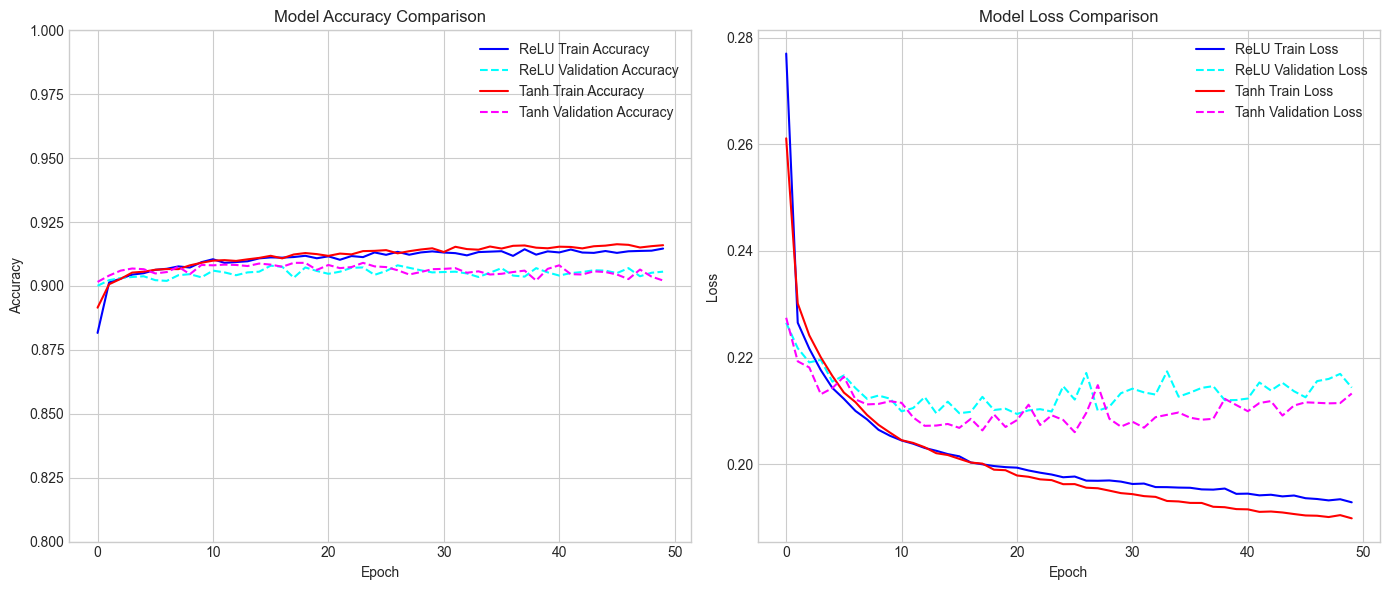

In [9]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_relu.history['accuracy'], label='ReLU Train Accuracy', color='blue')
plt.plot(history_relu.history['val_accuracy'], label='ReLU Validation Accuracy', color='cyan', linestyle='--')
plt.plot(history_tanh.history['accuracy'], label='Tanh Train Accuracy', color='red')
plt.plot(history_tanh.history['val_accuracy'], label='Tanh Validation Accuracy', color='magenta', linestyle='--')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0.8, 1.0)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_relu.history['loss'], label='ReLU Train Loss', color='blue')
plt.plot(history_relu.history['val_loss'], label='ReLU Validation Loss', color='cyan', linestyle='--')
plt.plot(history_tanh.history['loss'], label='Tanh Train Loss', color='red')
plt.plot(history_tanh.history['val_loss'], label='Tanh Validation Loss', color='magenta', linestyle='--')
plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.savefig('d:/ml/LP-I/training_history_comparison.png')
plt.show()

### 9. Conclusion

This notebook successfully implemented the required neural network models. 

- **Preprocessing**: Missing data was handled, and features were correctly scaled and encoded for the neural network.
- **Model Performance**: We observed the test accuracies for different hyperparameter settings and activation functions. Typically, the `ReLU` function performs well and is computationally efficient, which is often reflected in the results. The `tanh` function, being zero-centered, can sometimes help with faster convergence, but its performance is dataset-dependent.
- **Visualization**: The training history plots are crucial for diagnosing issues like overfitting. If the training accuracy continuously increases while validation accuracy flattens or decreases, it's a clear sign of overfitting. The model architecture plot confirms the structure of our network.